In [1]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import math
import helper_func
%matplotlib inline

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)


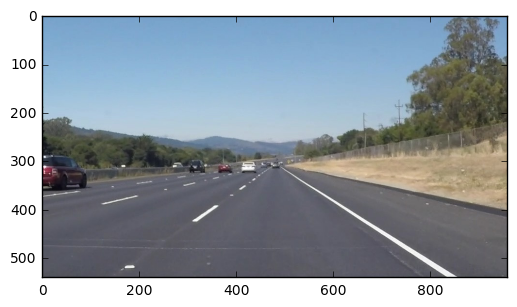

In [3]:
#reading in an image
image = mpimg.imread('test_images/solidWhiteRight.jpg')
#printing out some stats and plotting
print('This image is:', type(image), 'with dimesions:', image.shape)
plt.imshow(image)  #call as plt.imshow(gray, cmap='gray') to show a grayscaled image

In [4]:
b,g,r = cv2.split(image)
#merged_image = cv2.merge((b,g,r))
#plt.imshow(merged_image)

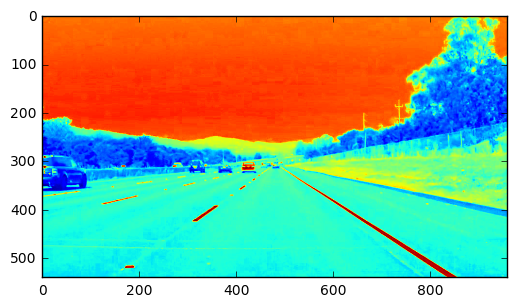

In [10]:
#print('>>:',b)
#print('>>:',b.shape)
plt.imshow(r)

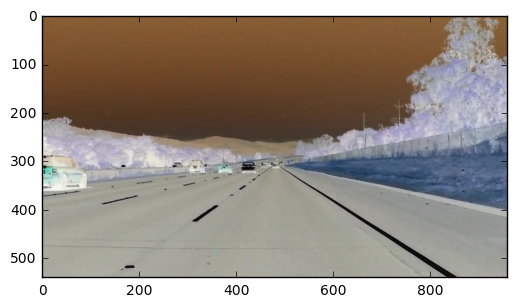

In [13]:
import numpy as np
copied_image = np.copy(image)*255
plt.imshow(copied_image)

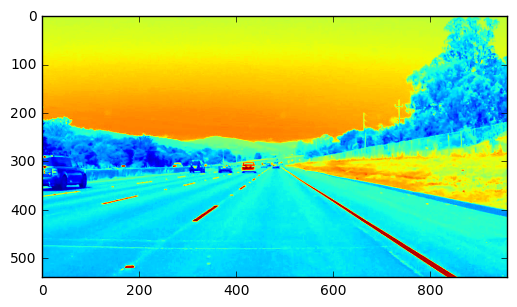

In [15]:
img = cv2.imread('test_images/solidWhiteRight.jpg',0)
plt.imshow(img)

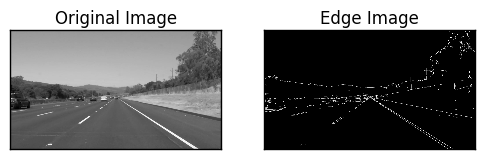

In [24]:
edges = cv2.Canny(img,100,200)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

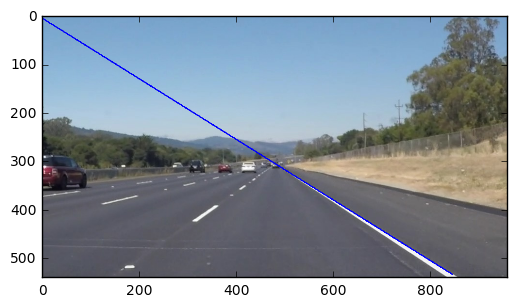

In [27]:
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)

lines = cv2.HoughLines(edges,1,np.pi/180,200)
for rho,theta in lines[0]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv2.line(image,(x1,y1),(x2,y2),(0,0,255),2)

#cv2.imwrite('houghlines.jpg',image)
plt.imshow(image)

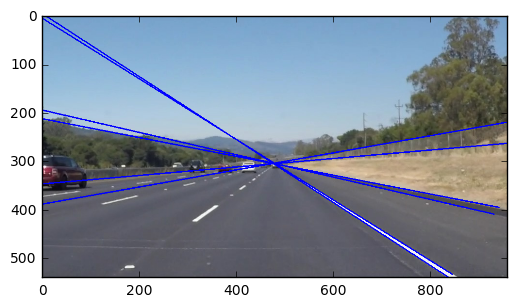

In [47]:
#using lines[1], previous lines[0]
for rho,theta in lines[2]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv2.line(image,(x1,y1),(x2,y2),(0,0,255),2)

#cv2.imwrite('houghlines.jpg',image)
plt.imshow(image)

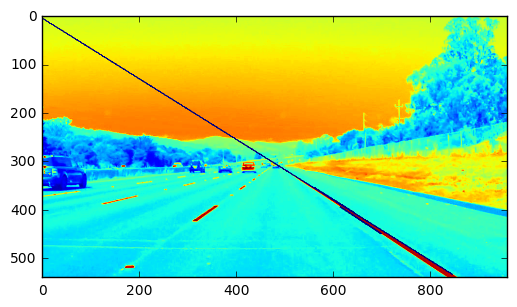

In [52]:
minLineLength = 100
maxLineGap = 10
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,maxLineGap)
for x1,y1,x2,y2 in lines[0]:
    cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)
plt.imshow(img)

##Again I am reading the image
#### with out using helper function

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)


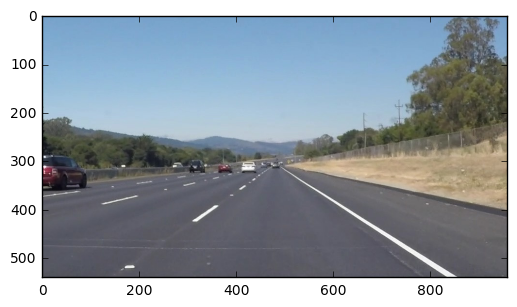

In [2]:
#reading in an image
image = mpimg.imread('test_images/solidWhiteRight.jpg')
#image = (mpimg.imread('test_images/solidWhiteRight.jpg')*255).astype('uint8')
#printing out some stats and plotting
print('This image is:', type(image), 'with dimesions:', image.shape)
plt.imshow(image)  #call as plt.imshow(gray, cmap='gray') to show a grayscaled image

In [3]:
# Read in and grayscale the image
# Note: in the previous example we were reading a .jpg 
# Here we read a .png and convert to 0,255 bytescale
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
# Define a kernel size and apply Gaussian smoothing
kernel_size = 5
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)
# Define our parameters for Canny and apply
low_threshold = 50
high_threshold = 150
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)
# Next we'll create a masked edges image using cv2.fillPoly()
mask = np.zeros_like(edges)   
ignore_mask_color = 255
# This time we are defining a four sided polygon to mask
imshape = image.shape
#vertices = np.array([[(0,imshape[0]),(0, 0), (imshape[1], 0), (imshape[1],imshape[0])]], dtype=np.int32)
vertices = np.array([[(150,540),(450,320), (490,310), (imshape[1],imshape[0])]], dtype=np.int32)
        #print('with dimensions:',vertices)
cv2.fillPoly(mask, vertices, ignore_mask_color)
masked_edges = cv2.bitwise_and(edges, mask)  
# Define the Hough transform parameters
# Make a blank the same size as our image to draw on
rho = 2 # distance resolution in pixels of the Hough grid
theta = np.pi/180 # angular resolution in radians of the Hough grid
threshold = 15     # minimum number of votes (intersections in Hough grid cell)
min_line_length =40 #minimum number of pixels making up a line
max_line_gap =20    # maximum gap in pixels between connectable line segments
line_image = np.copy(image)*0 # creating a blank to draw lines on
# Run Hough on edge detected image
# Output "lines" is an array containing endpoints of detected line segments
lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]),
                            min_line_length, max_line_gap)
# Iterate over the output "lines" and draw lines on a blank image
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(0,200,0),5)
# Create a "color" binary image to combine with line image
color_edges = np.dstack((edges, edges, edges))         
# Draw the lines on the edge image
lines_edges = cv2.addWeighted(color_edges,0.8, line_image, 1, 0) 

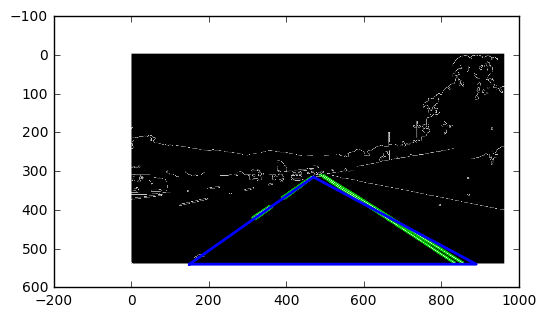

In [5]:
# WHERE THE LANE LINES ARE IN THE IMAGE
left_bottom =[150,540]
right_bottom =[890,540]
apex = [470,315]
# Perform a linear fit (y=Ax+B) to each of the three sides of the triangle
# np.polyfit returns the coefficients [A, B] of the fit
fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)


plt.imshow(lines_edges)
x = [left_bottom[0], right_bottom[0], apex[0], left_bottom[0]]
y = [left_bottom[1], right_bottom[1], apex[1], left_bottom[1]]
plt.plot(x, y, 'b', lw=2)

In [6]:
lines.shape

(14, 1, 4)

In [8]:
imshape
#print('dim',image.shape)

(540, 960, 3)

In [15]:
#print('canny edges',edges)

In [17]:
#print('QQQ',color_edges)

In [19]:
#print('',lines)

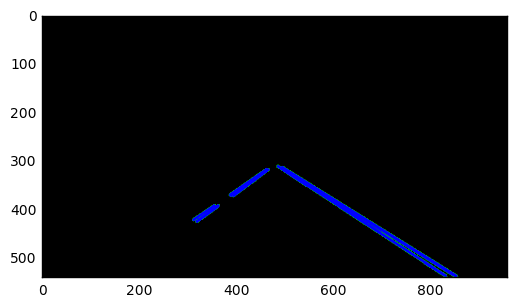

In [10]:
#many Hough lines
a,b,c = lines.shape
for i in range(a):
    cv2.line(line_image, (lines[i][0][0], lines[i][0][1]), (lines[i][0][2], lines[i][0][3]), (0, 0, 255), 3, cv2.LINE_AA)
plt.imshow(line_image)

In [62]:
cv2.imshow('edges', edges)
cv2.imshow('result',line_image)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [20]:
# Create a "color" binary image to combine with line image
additional_channels = np.dstack((np.zeros_like(line_image),)*(image.shape[2]-1))
multi_channel_line_image = np.dstack((line_image, additional_channels))

In [29]:
  # Display the image and show region and color selections
#result = weighted_img( multi_channel_line_image, img, α=0.8, β=1., λ=0.)
#result=cv2.addWeighted(edges,0.8,multi_channel_line_image,1,0)
#plt.imshow(result)

# Making DRAW function()

In [138]:
#reading in an image
image = mpimg.imread('test_images/solidWhiteRight.jpg')
#image = (mpimg.imread('test_images/solidWhiteRight.jpg')*255).astype('uint8')
#printing out some stats and plotting
print('This image is:', type(image), 'with dimesions:', image.shape)
#plt.imshow(image)  #call as plt.imshow(gray, cmap='gray') to show a grayscaled image

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)


In [139]:
# Read in and grayscale the image
# Note: in the previous example we were reading a .jpg 
# Here we read a .png and convert to 0,255 bytescale
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
# Define a kernel size and apply Gaussian smoothing
kernel_size = 5
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)
# Define our parameters for Canny and apply
low_threshold = 50
high_threshold = 150
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)
# Next we'll create a masked edges image using cv2.fillPoly()
mask = np.zeros_like(edges)   
ignore_mask_color = 255
# This time we are defining a four sided polygon to mask
imshape = image.shape
#vertices = np.array([[(0,imshape[0]),(0, 0), (imshape[1], 0), (imshape[1],imshape[0])]], dtype=np.int32)
vertices = np.array([[(150,540),(450,320), (490,310), (imshape[1],imshape[0])]], dtype=np.int32)
        #print('with dimensions:',vertices)
cv2.fillPoly(mask, vertices, ignore_mask_color)
masked_edges = cv2.bitwise_and(edges, mask)  
# Define the Hough transform parameters
# Make a blank the same size as our image to draw on
rho = 2 # distance resolution in pixels of the Hough grid
theta = np.pi/180 # angular resolution in radians of the Hough grid
threshold = 15     # minimum number of votes (intersections in Hough grid cell)
min_line_length =40 #minimum number of pixels making up a line
max_line_gap =20    # maximum gap in pixels between connectable line segments
line_image = np.copy(image)*0 # creating a blank to draw lines on
# Run Hough on edge detected image
# Output "lines" is an array containing endpoints of detected line segments
lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]),
                            min_line_length, max_line_gap)

In [140]:
## Right lane, negative slope
## Left lane, positive slope
x_Nve,y_Nve,x_Pve,y_Pve,slope_Nve,slope_Pve,intercept_Nve,intercept_Pve,Y,X = [],[],[],[],[],[],[],[],[],[]
y_min = 310
y_max = imshape[0]
for line in lines:
    for x1,y1,x2,y2 in line:
        #identify global minimum y
        if y1<320:
            y_min=y1
        eu_dist = math.hypot(x2 - x1, y2 - y1)
        if x2 != x1:
            slope = (y2-y1)/(x2-x1)
        #intercept = np.mean([(y1 - slope*x1),(y2-slope*x2)])
        if 0.8 >slope or math.isnan(slope) or math.isinf(slope) > 0.4:
            slope_Pve.append(slope)
            x_Pve.append(x1)
            x_Pve.append(x2)
            y_Pve.append(y1)
            y_Pve.append(y2)
            #intercept_Pve.append(intercept)
        if -0.8 < slope or math.isnan(slope) or math.isinf(slope) < -0.4:
            slope_Nve.append(slope)
            x_Nve.append(x1)
            x_Nve.append(x2)
            y_Nve.append(y1)
            y_Nve.append(y2)  
            #intercept_Nve.append(intercept)
    #Averaging the position of line segment right side
avg_slope_Nve= sum(slope_Nve)/float(len(slope_Nve))
avg_x_Nve=sum(x_Nve)/float(len(x_Nve))
avg_y_Nve=sum(y_Nve)/float(len(y_Nve))
#Calculate intercept for averaged right coordinates
intercept_Nve= avg_y_Nve-(avg_slope_Nve*avg_x_Nve)
#Find x1,x2 for highest point, we already have y1,y2
if y_min-intercept_Nve==0 or y_max-intercept_Nve==0 or math.isnan(intercept_Nve) or math.isinf(intercept_Nve):
    x1_Nve=(y_min-intercept_Nve)/avg_slope_Nve
    x2_Nve=(y_max-intercept_Nve)/avg_slope_Nve
#Draw right line
cv2.line(image, (int(x1_Nve), y_min), (int(x2_Nve), y_max),[0,0,250],20)
   
###Averaging the position of line segment left side
avg_slope_Pve= sum(slope_Pve)/float(len(slope_Pve))
avg_x_Pve=sum(x_Pve)/float(len(x_Pve))
avg_y_Pve=sum(y_Pve)/float(len(y_Pve))
#Calculate intercept for averaged left coordinates
intercept_Pve= avg_y_Pve-(avg_slope_Pve*avg_x_Pve)
#Find x1,x2 for highest point, we already have y1,y2
if y_min-intercept_Pve==0 or y_max-intercept_Pve==0 or math.isnan(intercept_Pve) or math.isinf(intercept_Pve):
    x1_Pve=(y_min-intercept_Pve)/avg_slope_Pve
    x2_Pve=(y_max-intercept_Pve)/avg_slope_Pve
#Draw left line
cv2.line(image, (int(x1_Pve), y_min), (int(x2_Pve), y_max),[0,0,250],20)
# Create a "color" binary image to combine with line image
color_edges = np.dstack((edges, edges, edges))         
# Draw the lines on the edge image
lines_edges = cv2.addWeighted(color_edges,0.8, line_image, 1, 0) 

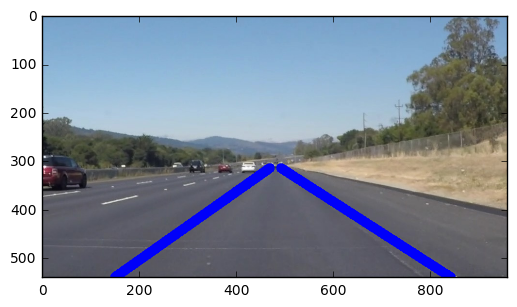

In [141]:
plt.imshow(image)

In [115]:
line[0][2]-line[0][0]

54

In [122]:
avg_slope_Nve

-0.70603506637993207

In [ ]:
if slope == 0 or math.isnan(slope) or math.isinf(slope)

In [130]:
math.isnan(x2_Pve)

False

In [129]:
math.isinf(x2_Pve)

False

In [144]:
float(len(slope_Pve))

14.0

In [143]:
len(slope_Nve)

14

In [146]:
float(sum(slope_Pve))

-1.7918532743242284

In [150]:
len(y_Pve)

28

In [151]:
imshape[0]

540

In [153]:
325/540

0.6018518518518519